# Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns;
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

pd.set_option('display.max_columns', 21)

# Raw Dataset

In [2]:
raw_df = pd.read_csv("../datasets/raw_telco_customer_churn.csv")

## Table

In [3]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

## Rename column

In [4]:
raw_rename_columns_df = raw_df.rename(columns={'customerID' : 'customer_id',
                                               'SeniorCitizen' : 'senior_citizen',
                                               'Partner' : 'partner',
                                               'Dependents' : 'dependents',
                                               'PhoneService' : 'phone_service',
                                               'MultipleLines' : 'multiple_lines',
                                               'InternetService' : 'internet_service',
                                               'OnlineSecurity' : 'online_security',
                                               'OnlineBackup' : 'online_backup',
                                               'DeviceProtection' : 'device_protection',
                                               'TechSupport' : 'tech_support',
                                               'StreamingTV' : 'streaming_tv',
                                               'StreamingMovies' : 'streaming_movies',
                                               'Contract' : 'contract',
                                               'PaperlessBilling' : 'paperless_billing',
                                               'PaymentMethod' : 'payment_method',
                                               'MonthlyCharges' : 'monthly_charges',
                                               'TotalCharges' : 'total_charges',
                                               'Churn' : 'churn'})

In [5]:
raw_rename_columns_df.head(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Outlier

### 
Tidak ada outlier

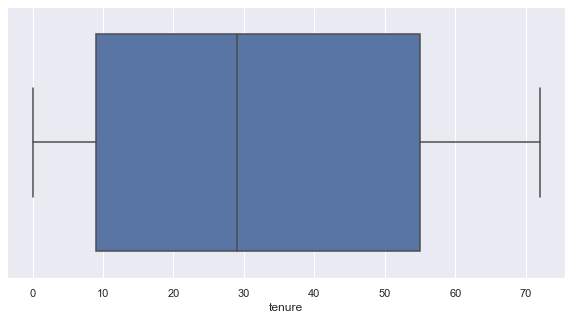

In [6]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x=raw_rename_columns_df["tenure"])

### monthly_charges
Tidak ada outlier

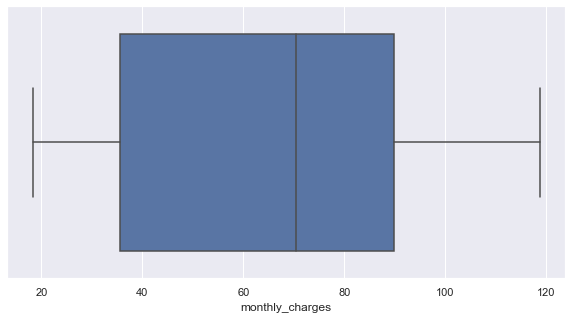

In [7]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x=raw_rename_columns_df["monthly_charges"])

### total_charges
Tidak ada outlier

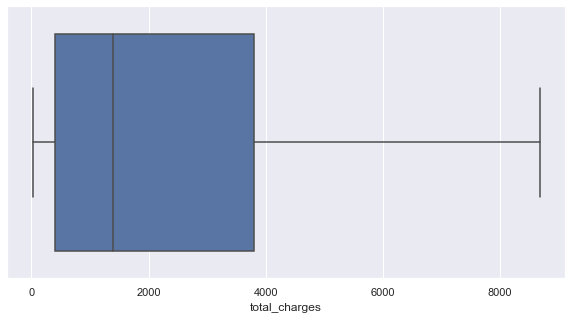

In [8]:
sns.set(rc={'figure.figsize':(10, 5)})
ax = sns.boxplot(x=pd.to_numeric(raw_rename_columns_df['total_charges'], errors='coerce'))

## Missing Value

In [9]:
raw_rename_columns_df.isna().sum().to_frame().rename(columns={0 : 'Number of Missing Value (%)'})

,Number of Missing Value (%)
customer_id,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0
online_security,0


## Duplicate Value

In [10]:
print(f'Number of duplicate value : {raw_rename_columns_df.duplicated().sum()}')

Number of duplicate value : 0


## Mismatch Value
Pada fitur total_charges datatype nya adalah object, yang seharusnya float.

In [11]:
raw_rename_columns_df.dtypes.to_frame().rename(columns={0 : 'Datatype'})

,Datatype
customer_id,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object


In [12]:
raw_rename_columns_df['total_charges'] = pd.to_numeric(raw_rename_columns_df['total_charges'], errors='coerce')
raw_mismatch_value_df = raw_rename_columns_df

In [13]:
raw_rename_columns_df.dtypes.to_frame().rename(columns={0 : 'Datatype'})

,Datatype
customer_id,object
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object


# Feature Engineering

## Feature Transformation

In [14]:
feature_tranformation_df = raw_mismatch_value_df

In [15]:
feature_tranformation_df.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


### Binary Lable

#### gender

In [16]:
gender_lb = preprocessing.LabelBinarizer()
gender_lb.fit(feature_tranformation_df['gender'])
gender_lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [17]:
feature_tranformation_df['gender'] = gender_lb.transform(raw_mismatch_value_df['gender'])

#### partner

In [18]:
partner_lb = preprocessing.LabelBinarizer()
partner_lb.fit(feature_tranformation_df['partner'])
partner_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [19]:
feature_tranformation_df['partner'] = gender_lb.transform(raw_mismatch_value_df['partner'])

#### dependents

In [20]:
dependents_lb = preprocessing.LabelBinarizer()
dependents_lb.fit(feature_tranformation_df['dependents'])
dependents_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [21]:
feature_tranformation_df['dependents'] = gender_lb.transform(raw_mismatch_value_df['dependents'])

#### phone_service

In [22]:
phone_service_lb = preprocessing.LabelBinarizer()
phone_service_lb.fit(feature_tranformation_df['phone_service'])
phone_service_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [23]:
feature_tranformation_df['phone_service'] = gender_lb.transform(raw_mismatch_value_df['phone_service'])

#### paperless_billing

In [24]:
paperless_billing_lb = preprocessing.LabelBinarizer()
paperless_billing_lb.fit(feature_tranformation_df['paperless_billing'])
paperless_billing_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [25]:
feature_tranformation_df['paperless_billing'] = paperless_billing_lb.transform(raw_mismatch_value_df['paperless_billing'])

#### churn

In [26]:
churn_lb = preprocessing.LabelBinarizer()
churn_lb.fit(feature_tranformation_df['churn'])
churn_lb.classes_

array(['No', 'Yes'], dtype='<U3')

In [27]:
feature_tranformation_df['churn'] = churn_lb.transform(raw_mismatch_value_df['churn'])

### Multiple Lable

#### multiple_lines

In [28]:
multiple_lines_lb = preprocessing.LabelBinarizer()
multiple_lines_lb.fit(feature_tranformation_df['multiple_lines'])
multiple_lines_lb.classes_

array(['No', 'No phone service', 'Yes'], dtype='<U16')

In [29]:
feature_tranformation_df['multiple_lines'] = multiple_lines_lb.transform(raw_mismatch_value_df['multiple_lines'])

#### internet_service

In [30]:
internet_sevice_le = preprocessing.LabelEncoder()
internet_sevice_le.fit(feature_tranformation_df['internet_service'])
internet_sevice_le.classes_

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [31]:
feature_tranformation_df['internet_service'] = internet_sevice_le.transform(raw_mismatch_value_df['internet_service'])

#### online_security

In [32]:
online_security_lb = preprocessing.LabelEncoder()
online_security_lb.fit(feature_tranformation_df['online_security'])
online_security_lb.classes_

array(['No', 'No internet service', 'Yes'], dtype=object)

In [33]:
feature_tranformation_df['online_security'] = online_security_lb.transform(raw_mismatch_value_df['online_security'])

#### online_backup

In [34]:
online_backup_lb = preprocessing.LabelEncoder()
online_backup_lb.fit(feature_tranformation_df['online_backup'])
online_backup_lb.classes_

array(['No', 'No internet service', 'Yes'], dtype=object)

In [35]:
feature_tranformation_df['online_backup'] = online_backup_lb.transform(raw_mismatch_value_df['online_backup'])

#### device_protection

In [36]:
device_protection_lb = preprocessing.LabelBinarizer()
device_protection_lb.fit(feature_tranformation_df['device_protection'])
device_protection_lb.classes_

array(['No', 'No internet service', 'Yes'], dtype='<U19')

In [37]:
feature_tranformation_df['device_protection'] = device_protection_lb.transform(raw_mismatch_value_df['device_protection'])

#### tech_support

In [38]:
tech_support_lb = preprocessing.LabelBinarizer()
tech_support_lb.fit(feature_tranformation_df['tech_support'])
tech_support_lb.classes_

array(['No', 'No internet service', 'Yes'], dtype='<U19')

In [39]:
feature_tranformation_df['tech_support'] = device_protection_lb.transform(raw_mismatch_value_df['tech_support'])

#### streaming_movies

In [40]:
streaming_tv_lb = preprocessing.LabelBinarizer()
streaming_tv_lb.fit(feature_tranformation_df['streaming_tv'])
streaming_tv_lb.classes_

array(['No', 'No internet service', 'Yes'], dtype='<U19')

In [41]:
feature_tranformation_df['streaming_tv'] = streaming_tv_lb.transform(raw_mismatch_value_df['streaming_tv'])

#### streaming_movies

In [42]:
streaming_movies_lb = preprocessing.LabelBinarizer()
streaming_movies_lb.fit(feature_tranformation_df['streaming_movies'])
streaming_movies_lb.classes_

array(['No', 'No internet service', 'Yes'], dtype='<U19')

In [43]:
feature_tranformation_df['streaming_movies'] = streaming_tv_lb.transform(raw_mismatch_value_df['streaming_movies'])

#### contract

In [44]:
contract_le = preprocessing.LabelEncoder()
contract_le.fit(feature_tranformation_df['contract'])
contract_le.classes_

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [45]:
feature_tranformation_df['contract'] = contract_le.transform(raw_mismatch_value_df['contract'])

#### payment_method

In [46]:
payment_method_le = preprocessing.LabelEncoder()
payment_method_le.fit(feature_tranformation_df['payment_method'])
payment_method_le.classes_

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [47]:
feature_tranformation_df['payment_method'] = payment_method_le.transform(raw_mismatch_value_df['payment_method'])

### New feature

#### total_charges
Nilai dari feature tidak sesuai tidak sesuai dengan hasil kalkulasi dari tenure * monthly_charges. Maka akan dibuat dibuat fitur baru dari hasil perkalian tenure dan monthly_charges

In [48]:
feature_tranformation_df.drop(['total_charges'], axis=1).head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,2,1,1,1,1,0,1,2,29.85,0
1,5575-GNVDE,1,0,0,0,34,0,1,0,2,0,0,1,1,1,1,0,3,56.95,0
2,3668-QPYBK,1,0,0,0,2,0,1,0,2,2,1,1,1,1,0,1,3,53.85,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,2,0,0,0,1,1,1,0,0,42.30,0
4,9237-HQITU,0,0,0,0,2,0,1,1,0,0,1,1,1,1,0,1,2,70.70,1


In [49]:
feature_tranformation_df['total_charges'] = feature_tranformation_df['tenure'] * feature_tranformation_df['monthly_charges']

In [50]:
feature_tranformation_df[['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
                              'tenure', 'phone_service', 'multiple_lines', 'internet_service',
                              'online_security', 'online_backup', 'device_protection', 'tech_support',
                              'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
                              'payment_method', 'monthly_charges', 'total_charges', 'churn',
                             ]].head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,0,0,1,0,0,0,0,2,1,1,1,1,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,0,1,0,2,0,0,1,1,1,1,0,3,56.95,1936.30,0
2,3668-QPYBK,1,0,0,0,2,0,1,0,2,2,1,1,1,1,0,1,3,53.85,107.70,1
3,7795-CFOCW,1,0,0,0,45,0,0,0,2,0,0,0,1,1,1,0,0,42.30,1903.50,0
4,9237-HQITU,0,0,0,0,2,0,1,1,0,0,1,1,1,1,0,1,2,70.70,141.40,1


In [51]:
feature_tranformation_df['customer_id'].duplicated().sum()

0

## Feature Extraction

In [52]:
feature_extraction_df = feature_tranformation_df.drop(['customer_id', 'churn'], axis=1)

### Principal Component Analysis

In [53]:
pca = PCA(n_components=19)
pca.fit(feature_extraction_df)

PCA(n_components=19)

In [54]:
for component, explained_variance_ratio in enumerate(pca.explained_variance_ratio_):
    print(f'{component + 1} component : {(explained_variance_ratio * 100):.4f}%')

1 component : 99.9860%
2 component : 0.0122%
3 component : 0.0017%
4 component : 0.0000%
5 component : 0.0000%
6 component : 0.0000%
7 component : 0.0000%
8 component : 0.0000%
9 component : 0.0000%
10 component : 0.0000%
11 component : 0.0000%
12 component : 0.0000%
13 component : 0.0000%
14 component : 0.0000%
15 component : 0.0000%
16 component : 0.0000%
17 component : 0.0000%
18 component : 0.0000%
19 component : 0.0000%


Dengan 1 component, explained variance yang dihasilkan sebesar 99.986%. Sehingga berhasil mereduksi dimensi sebanyak 18 dimensi, yang dimana dimensi awal sebanyak 19 dimensi.

### Explained Variance Ratio Plot

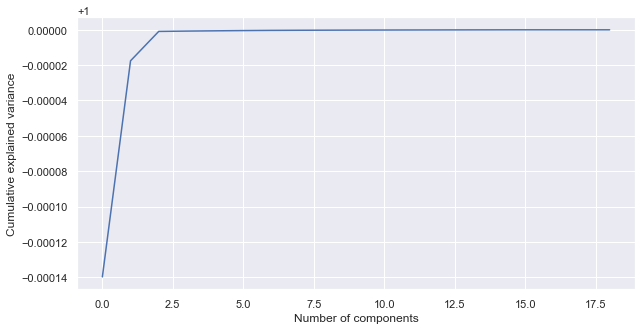

In [55]:
pca = PCA().fit(feature_extraction_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

### Show Component in Table

In [56]:
pca = PCA()

X_pca = pca.fit_transform(feature_extraction_df)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2250.140045,-8.858334,-16.866177,0.537938,0.863554,0.285455,2.012932,0.231845,-0.575978,-0.659881,-0.069719,-0.326789,-0.046973,0.067055,-0.258124,-0.061853,1.834687e-16,-7.279575e-17,1.109482e-17
1,-343.307955,-6.421186,2.050109,-1.210040,1.000175,1.622959,-0.808348,0.177327,0.534054,0.606820,0.105766,0.098789,0.762816,0.361595,-0.218744,0.022169,-1.145575e-16,-1.244364e-17,-9.051102e-18
2,-2172.079419,11.903544,-6.320750,-0.750781,-0.114083,2.107724,1.208150,-0.365683,0.512765,-0.080937,-0.611786,-0.021365,0.010818,0.263277,-0.169433,-0.046724,2.565501e-14,-4.615056e-16,2.621772e-16
3,-376.133063,-24.310237,5.894243,1.654425,0.794520,1.311847,-0.810647,0.070013,0.514845,-0.080275,0.615834,0.118805,0.488248,-0.602599,0.071657,0.055378,-7.064958e-15,-1.282951e-15,9.775247e-16
4,-2138.236555,26.903713,0.763079,0.029638,0.496248,-0.233726,-0.172891,0.012398,-0.493317,0.447699,-0.573066,-0.398175,0.050407,-0.100429,-0.230195,-0.069092,-1.422434e-17,-5.338028e-17,-3.077091e-18


### Factor Loading

In [57]:
factor_loadings = pd.DataFrame(
    pca.components_.T,
    
    columns = component_names,
    index   = feature_extraction_df.columns,
)

factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
gender,-6.753369e-09,-3.572193e-04,-4.761319e-04,-1.077697e-02,2.182351e-02,-1.397326e-02,-1.531263e-03,1.420921e-02,9.967306e-01,-7.024061e-02,-2.106550e-02,-5.973240e-03,-7.180509e-03,-7.017264e-03,3.711184e-03,-2.854268e-03,7.505763e-16,-3.434564e-16,-7.226942e-17
senior_citizen,1.680736e-05,2.866770e-03,2.244735e-03,4.735772e-03,4.111486e-02,-6.172048e-02,2.798029e-02,-1.222496e-01,-6.721324e-03,-9.938473e-02,2.527944e-02,-1.569901e-01,1.600722e-01,3.028032e-01,8.829723e-01,2.158150e-01,4.550317e-14,-1.811092e-14,-4.236503e-15
partner,-0.000000e+00,-1.082467e-15,5.689893e-16,-7.164408e-16,-2.105954e-15,3.475518e-15,-1.602288e-15,4.949600e-15,-2.956348e-16,7.977776e-15,-3.239705e-15,3.389758e-15,-2.729696e-15,-1.365563e-14,-4.426803e-14,-1.463077e-14,9.208904e-01,-3.806114e-01,-8.423751e-02
dependents,2.710505e-20,0.000000e+00,-2.220446e-16,2.775558e-17,3.885781e-16,2.775558e-17,-2.550044e-16,7.285839e-17,-2.515349e-17,2.220446e-16,3.122502e-17,4.683753e-16,-6.245005e-17,-1.457168e-16,5.065393e-16,4.475587e-16,-3.898203e-01,-8.997001e-01,-1.964174e-01
tenure,8.962857e-03,-4.419918e-01,8.963800e-01,-2.088114e-02,1.154759e-02,-8.182898e-04,6.065257e-03,-1.745246e-02,4.188367e-04,4.318539e-03,1.835837e-03,1.091208e-02,-3.575379e-04,-3.582540e-03,-2.195591e-04,-1.865566e-04,-8.805572e-16,1.780449e-16,1.098246e-16
phone_service,-0.000000e+00,0.000000e+00,1.084202e-19,-1.110223e-16,-6.245005e-17,1.665335e-16,1.942890e-16,1.110223e-16,-2.775558e-17,-1.110223e-16,-5.551115e-17,5.551115e-17,-1.942890e-16,-3.330669e-16,-1.942890e-16,1.665335e-16,-1.029808e-03,2.137164e-01,-9.768952e-01
multiple_lines,-8.741826e-05,-1.764310e-03,-5.696035e-03,-2.700293e-02,-1.024555e-01,3.185854e-03,-5.284583e-02,-8.091735e-03,4.407564e-02,7.094690e-01,-5.460185e-01,3.547980e-01,2.397581e-02,2.218970e-01,8.132809e-02,1.164995e-02,-1.720854e-15,9.803775e-16,3.730270e-16
internet_service,-5.735368e-05,-8.103677e-03,-2.082550e-03,-1.279681e-01,-4.982366e-01,-4.536032e-01,-2.238822e-01,-3.940878e-01,1.600493e-02,1.749302e-01,-4.596583e-02,-5.190682e-01,-3.039485e-03,-1.225169e-01,-7.707862e-02,-2.771266e-02,-3.088057e-15,1.018141e-15,1.992392e-16
online_security,9.611093e-05,-9.842196e-03,-3.563893e-03,-1.776767e-03,-3.094382e-01,8.118263e-01,-3.321640e-01,-3.496702e-01,1.654622e-02,-8.400109e-02,-1.312834e-02,-4.266651e-02,-3.636970e-03,5.563145e-02,-3.005416e-03,5.594579e-03,-7.644482e-16,1.066779e-16,1.090502e-16
online_backup,1.456334e-04,-5.652883e-03,-3.217151e-03,-4.194347e-02,-4.929242e-01,1.491814e-01,8.551184e-01,-2.072939e-02,1.349512e-02,-1.078881e-02,4.620174e-03,-8.816680e-03,-3.696593e-03,2.832393e-02,-6.322981e-03,-7.639895e-03,-1.609723e-16,-2.703676e-16,-3.161977e-17


### Concate PCA Value with Churn Feature

In [58]:
PCA_df = pd.concat([X_pca, feature_tranformation_df['churn']], axis=1)
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,churn
0,-2250.140045,-8.858334,-16.866177,0.537938,0.863554,0.285455,2.012932,0.231845,-0.575978,-0.659881,-0.069719,-0.326789,-0.046973,0.067055,-0.258124,-0.061853,1.834687e-16,-7.279575e-17,1.109482e-17,0
1,-343.307955,-6.421186,2.050109,-1.210040,1.000175,1.622959,-0.808348,0.177327,0.534054,0.606820,0.105766,0.098789,0.762816,0.361595,-0.218744,0.022169,-1.145575e-16,-1.244364e-17,-9.051102e-18,0
2,-2172.079419,11.903544,-6.320750,-0.750781,-0.114083,2.107724,1.208150,-0.365683,0.512765,-0.080937,-0.611786,-0.021365,0.010818,0.263277,-0.169433,-0.046724,2.565501e-14,-4.615056e-16,2.621772e-16,1
3,-376.133063,-24.310237,5.894243,1.654425,0.794520,1.311847,-0.810647,0.070013,0.514845,-0.080275,0.615834,0.118805,0.488248,-0.602599,0.071657,0.055378,-7.064958e-15,-1.282951e-15,9.775247e-16,0
4,-2138.236555,26.903713,0.763079,0.029638,0.496248,-0.233726,-0.172891,0.012398,-0.493317,0.447699,-0.573066,-0.398175,0.050407,-0.100429,-0.230195,-0.069092,-1.422434e-17,-5.338028e-17,-3.077091e-18,1


### Save PCA Value

In [59]:
PCA_df.to_csv('../datasets/PCA_telco_customer_churn.csv', index=False)

## Feature Selection

In [60]:
feature_selection_df = feature_tranformation_df

### Pearson Correlation

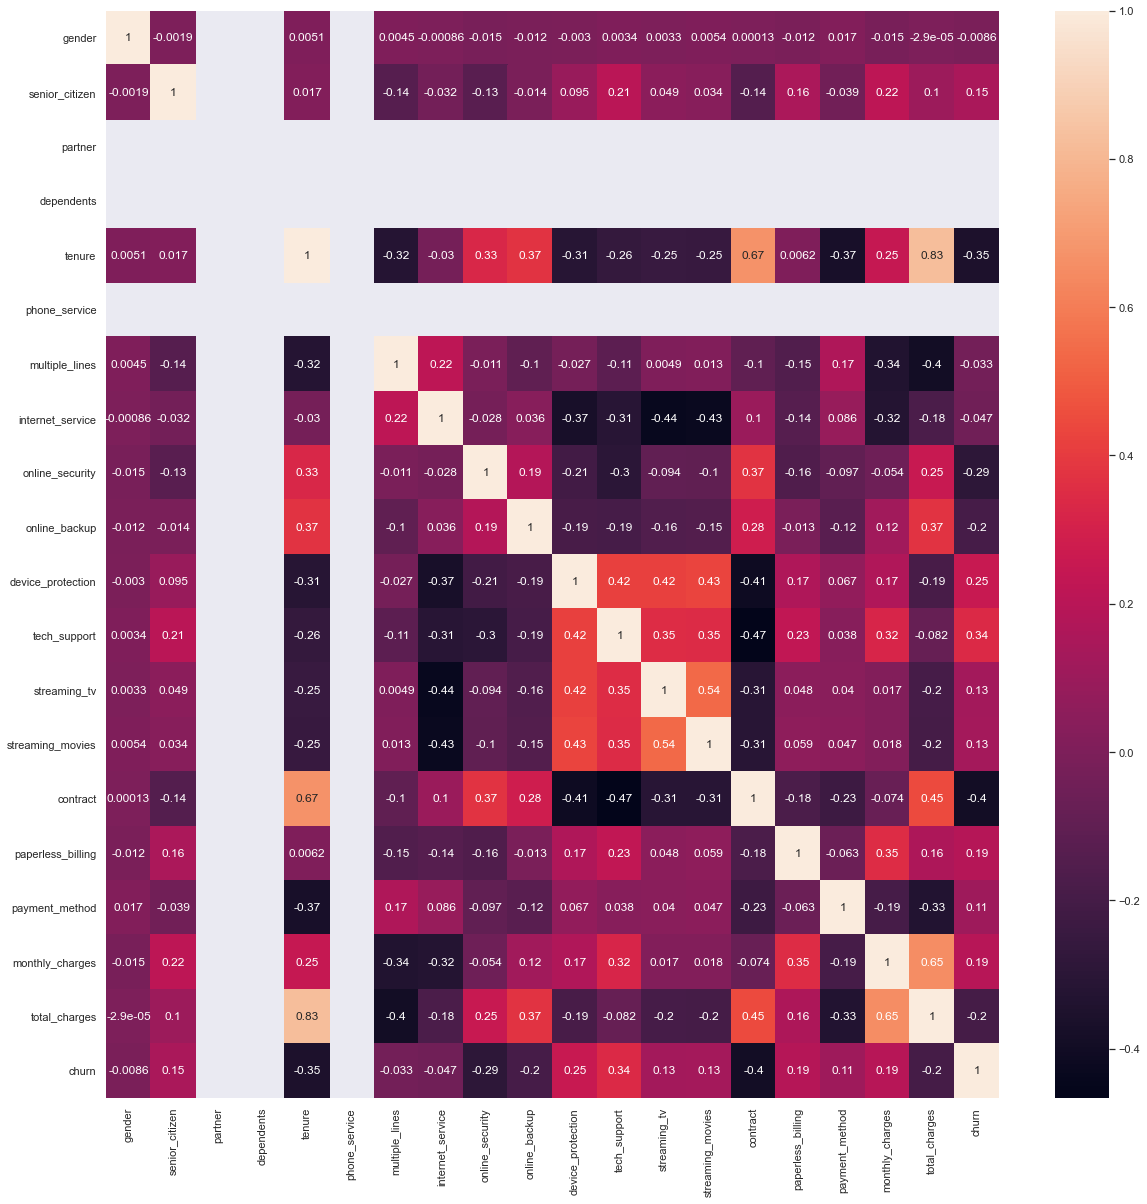

In [61]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(feature_selection_df.corr(), annot=True)

### Spearman Correlation (Non-Linier)

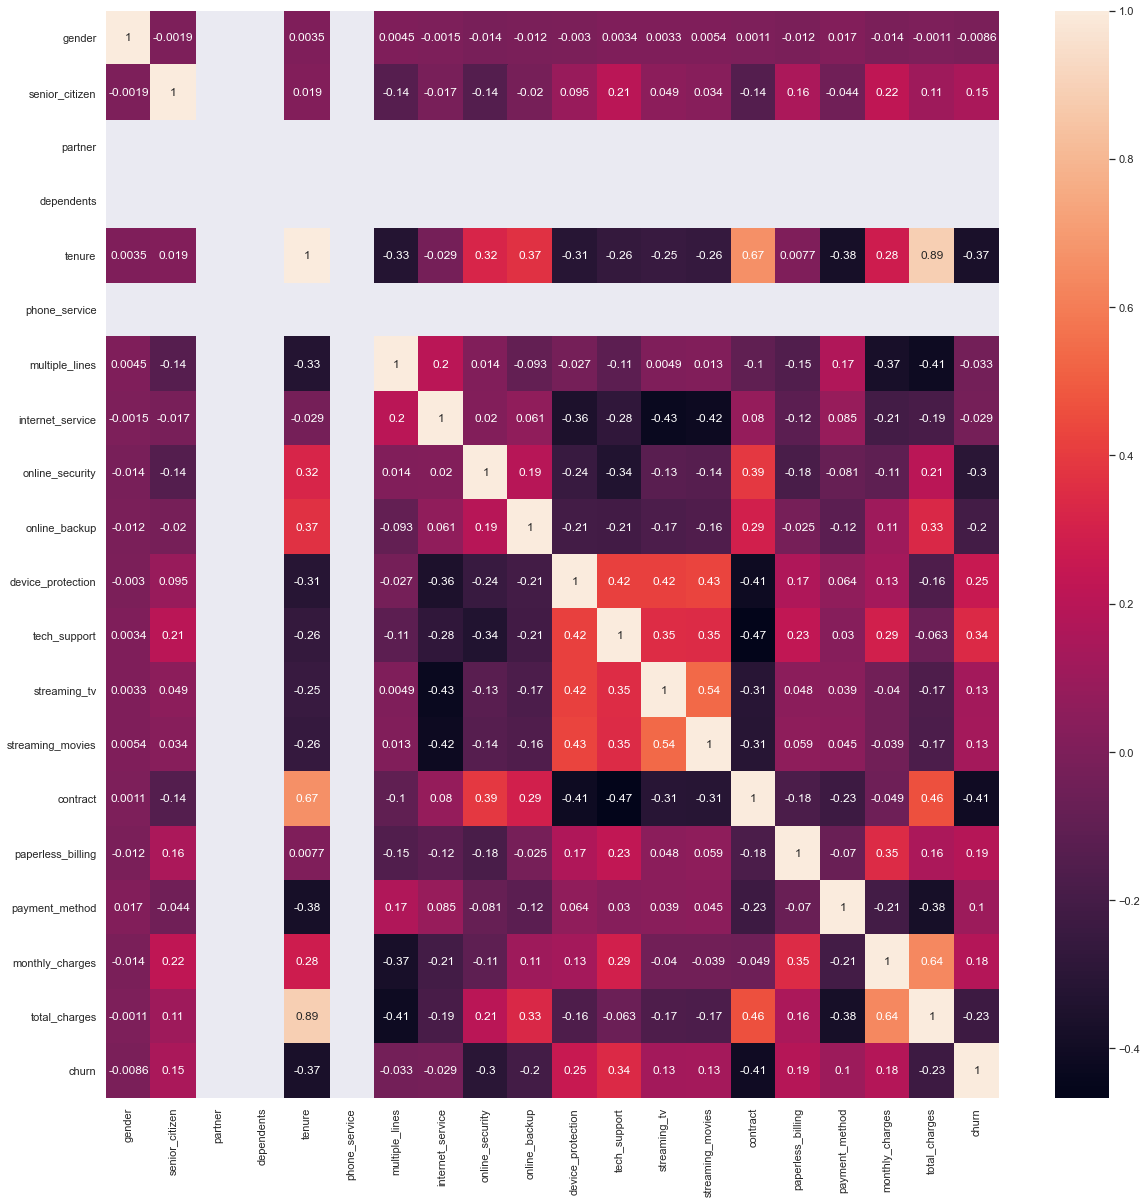

In [62]:
sns.heatmap(feature_selection_df.corr('spearman'), annot=True)

### Mutual Information

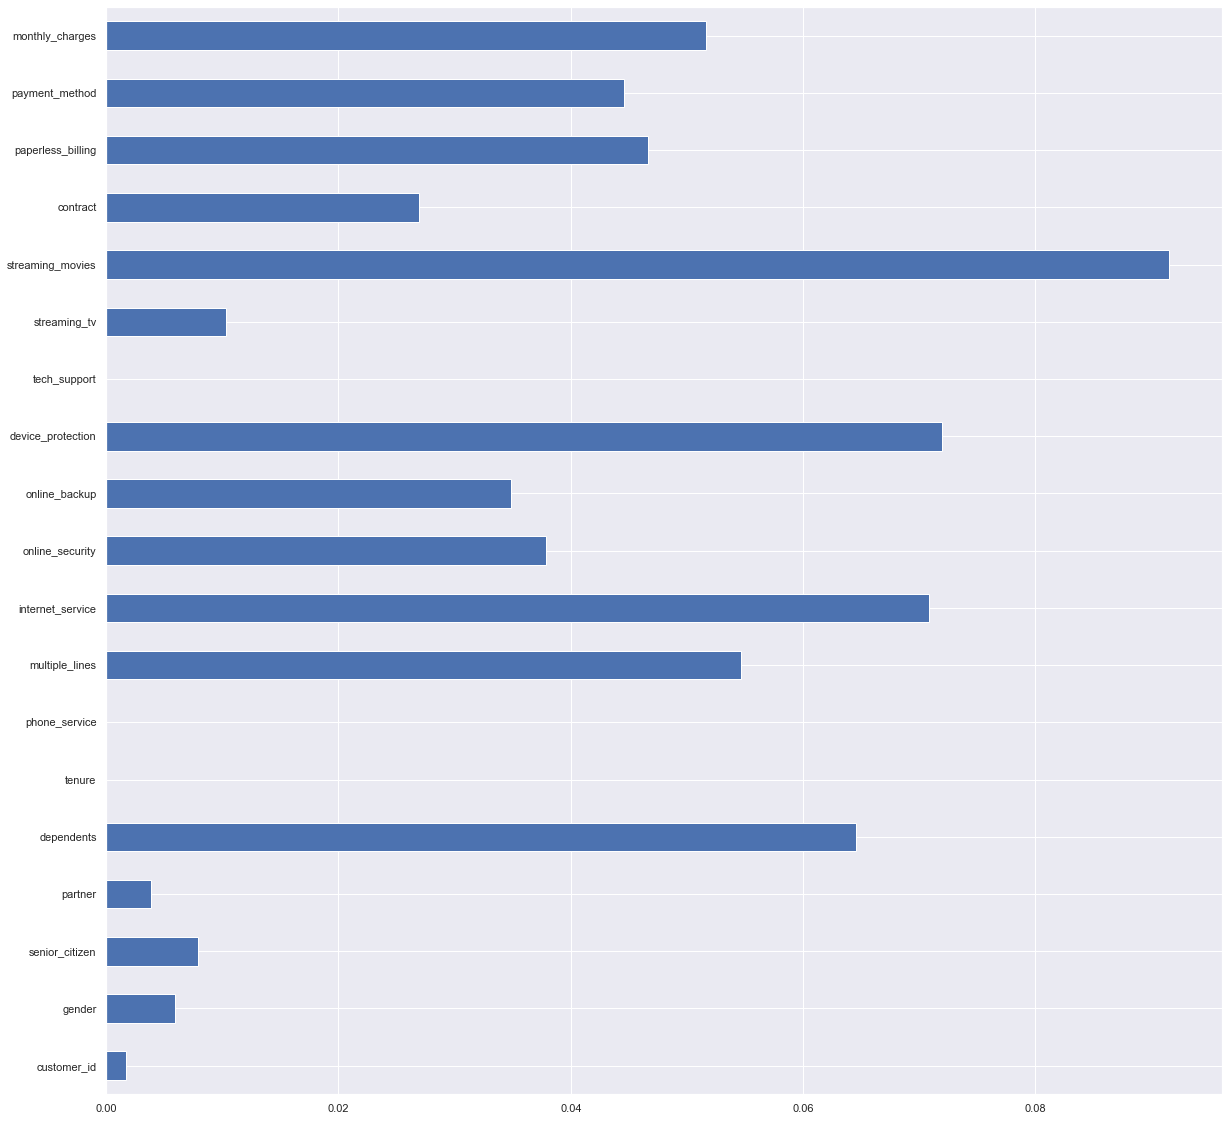

In [63]:
X = feature_selection_df.iloc[:, 1:20]
y = feature_selection_df.iloc[:, 20:21]
importance = mutual_info_classif(X, np.ravel(y))

feat_importance = pd.Series(importance, feature_selection_df.columns[0:19])
feat_importance.plot(kind='barh')
plt.show()

### Seleksi fitur berdasarkan korelasi positif terhadap target churn

In [64]:
feature_selection_df = feature_tranformation_df[['senior_citizen', 'dependents', 'tenure', 'multiple_lines', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'payment_method', 'monthly_charges', 'churn']]

In [65]:
feature_selection_df.head()

,senior_citizen,dependents,tenure,multiple_lines,streaming_tv,streaming_movies,paperless_billing,payment_method,monthly_charges,churn
0,0,0,1,0,1,1,1,2,29.85,0
1,0,0,34,1,1,1,0,3,56.95,0
2,0,0,2,1,1,1,1,3,53.85,1
3,0,0,45,0,1,1,0,0,42.30,0
4,0,0,2,1,1,1,1,2,70.70,1


### Save feature selection

In [66]:
feature_selection_df.to_csv('../datasets/feature_engineering_telco_customer_churn.csv', index=False)

# Split dataset

## EDA


### Split feature and target

In [67]:
EDA_df = pd.read_csv('../datasets/EDA_df.csv')
X_EDA = EDA_df.iloc[:, 0:20]
y_EDA = EDA_df.iloc[:, 20:21]

X_EDA_train, X_EDA_test, y_EDA_train, y_EDA_test = train_test_split(X_EDA, y_EDA, test_size=0.2, random_state=42)

### Show composostion train and test dataset

In [68]:
print(f'Train dataset')
print(f'X_EDA_train: {X_EDA_train.shape}')
print(f'y_EDA_train: {y_EDA_train.shape}')

print(f'\nTest dataset')
print(f'X_EDA_test: {X_EDA_test.shape}')
print(f'y_EDA_test: {y_EDA_test.shape}')

Train dataset
X_EDA_train: (5634, 20)
y_EDA_train: (5634, 1)

Test dataset
X_EDA_test: (1409, 20)
y_EDA_test: (1409, 1)


### Concate X_train and y_train / X_test and y_test

In [69]:
EDA_train_df = pd.concat([X_EDA_train, y_EDA_train], axis=1)
EDA_test_df  = pd.concat([X_EDA_test, y_EDA_test], axis=1)

### Save train and test dataset

In [70]:
EDA_train_df.to_csv('../datasets/train/EDA_train.csv', index=False)
EDA_test_df.to_csv('../datasets/test/EDA_test.csv', index=False)

## Feature Engineering

### Split feature and target

In [71]:
feature_engineering = pd.read_csv('../datasets/feature_engineering_telco_customer_churn.csv')
X = feature_engineering.iloc[:, 0:8]
y = feature_engineering.iloc[:, 8:9]

X_feature_engineering_train, X_feature_engineering_test, y_feature_engineering_train, y_feature_engineering_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Show composostion train and test dataset

In [72]:
print(f'Train dataset')
print(f'X_feature_engineering_train: {X_feature_engineering_train.shape}')
print(f'y_feature_engineering_train: {y_feature_engineering_train.shape}')

print(f'\nTest dataset')
print(f'X_feature_engineering_test: {X_feature_engineering_test.shape}')
print(f'y_feature_engineering_test: {y_feature_engineering_test.shape}')

Train dataset
X_feature_engineering_train: (5634, 8)
y_feature_engineering_train: (5634, 1)

Test dataset
X_feature_engineering_test: (1409, 8)
y_feature_engineering_test: (1409, 1)


### Concate X_train and y_train / X_test and y_test

In [73]:
feature_engineering_train_df = pd.concat([X_feature_engineering_train, y_feature_engineering_train], axis=1)
feature_engineering_test_df  = pd.concat([X_feature_engineering_test, y_feature_engineering_test], axis=1)

### Save train and test dataset

In [74]:
feature_engineering_train_df.to_csv('../datasets/train/feature_engineering_train.csv', index=False)
feature_engineering_test_df.to_csv('../datasets/test/feature_engineering_test.csv', index=False)

## PCA

### Split feature and target

In [75]:
PCA_df = pd.read_csv('../datasets/PCA_telco_customer_churn.csv')
X_PCA = PCA_df.iloc[:, 0:19]
y_PCA = PCA_df.iloc[:, 19:20]

X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=42)

### Show composostion train and test dataset

In [76]:
print(f'Train dataset')
print(f'X_EDA_train: {X_PCA_train.shape}')
print(f'y_EDA_train: {y_PCA_train.shape}')

print(f'\nTest dataset')
print(f'X_EDA_test: {X_PCA_test.shape}')
print(f'y_EDA_test: {y_PCA_test.shape}')

Train dataset
X_EDA_train: (5634, 19)
y_EDA_train: (5634, 1)

Test dataset
X_EDA_test: (1409, 19)
y_EDA_test: (1409, 1)


### Concate X_train and y_train / X_test and y_test

In [77]:
PCA_train_df = pd.concat([X_PCA_train, y_PCA_train], axis=1)
PCA_test_df  = pd.concat([X_PCA_test, y_PCA_test], axis=1)

### Save train and test dataset

In [78]:
PCA_train_df.to_csv('../datasets/train/PCA_train.csv', index=False)
PCA_test_df.to_csv('../datasets/test/PCA_test.csv', index=False)